# Bank Marketing Campaign Analysis Using Random Forests

**by Sean Kim**

*Welcome, marketers and aspiring data scientists! Now that you have an understanding of random forest models, you'll be tackling a real-world bank marketing problem. We will predict which customers will subscribe to a term deposit. We'll explain each step in detail, how torelate the results to real-world marketing actions, and invite you to try things out for yourself.*

---

## ***1. Introduction***

Imagine you work for a bank called Baekho Bank. You’re tasked to improve subscription rates for term deposits (fixed-term investment in a bank). In order to do this, you decide to build and tune a random forest model to predict whether customers subscribe to the term deposit using data from Baekho Bank’s marketing campaign.

Better predictions mean the bank can identify likely customers and understand what factors influence their decisions. This not only saves time and money in marketing but also provides insights into customer behavior (for example, we might discover that customers who had a positive response in a previous campaign or spoke longer on the call are more likely to subscribe again).

This activity will go step-by-step, from exploring the data to tuning a random forest model, and communicating the results. By the end, you will understand how the data features relate to marketing outcomes and how hyperparameter tuning can improve model performance.

The [UCI Bank Marketing dataset](https://archive.ics.uci.edu/dataset/222/bank+marketing) you will be using comes from direct phone-call campaigns conducted by a Portuguese bank between 2008 and 2010​. Each record corresponds to a client contact, with the goal of predicting whether the client will subscribe to a term deposit (denoted by y = "yes" or "no"). There are four different datasets included in the download link, we will be using the one titled, 'bank-additional-full.csv'.

Download the dataset from the [UCI Repository here](https://archive.ics.uci.edu/dataset/222/bank+marketing) and let's begin!

---

## ***2. Load the Data***

- Dataset Loading
- Exploratory Data Analysis (EDA)

### *1.1 Dataset Loading*

First, we need to load the dataset. The data is available from the UCI Machine Learning Repository. We will download the Bank Marketing dataset in CSV format (which is separated by semicolons). There are four versions of this dataset when you download it; we will use the "bank-additional-full.csv" dataset with all 41,188 examples and 20 input features



In [ ]:
# Run this cell and add the dataset to this directory
from google.colab import files
uploaded = files.upload()

Saving bank-additional-full.csv to bank-additional-full (1).csv


In [ ]:
# Load the dataset
import pandas as pd
data = pd.read_csv('bank-additional-full.csv', sep = ';')
print("Dataset loaded successfully")

Dataset loaded successfully


### *1.2 Exploratory Data Analysis (EDA)*

We will perform a very minimal exploratory data analysis (EDA). We'll focus on understanding the difference in classes in our dataset. For a more in depth guide on EDA's consider this guide by [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/).

In [ ]:
# Taking a look at the first few rows
print(data.head(5))

# Listing all features
print(data.columns)

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

### ***Understanding the Features***

Let's describe each column (feature) in simple terms. This dataset contains a mix of personal attributes, details of the contact campaign, and some external economic indicators. There is also an output column y which is our target (whether the client subscribed to a term deposit). Feature explanations:

- Client Information: (who the customer is)
  - `age`: Age of the client (numeric).
  - `job`: Type of job (categorical, e.g. admin, technician, services, etc.).
  - `marital`: Marital status (categorical, e.g. single, married, divorced).
  - `education`: Education level (categorical, e.g. basic 9y, high school, university, etc.).
  - `default`: Whether the client has credit in default (binary, yes or no).
  - `housing`: Whether the client has a housing loan (binary, yes or no).
  - `loan`: Whether the client has a personal loan (binary, yes or no).
- Last Contact (current campaign): (how and when the client was contacted in this campaign)
  - `contact`: Contact communication type (categorical, e.g. cellular or telephone).
  - `month`: Last contact month of year (categorical, e.g. jan, feb, ..., dec).
  - `day_of_week`: Last contact day of the week (categorical, e.g. mon, tue, wed, thu, fri).
  - `duration`: Last contact duration in seconds (numeric). Important: A longer call often means a higher chance they said yes. (Note that in a real scenario, we wouldn't know duration in advance – it's more of a retrospective indicator.)
- Previous Campaign: (information about any prior contacts with this client)
  - `campaign`: Number of contacts performed during this campaign (numeric, includes the current contact).
  - `pdays`: Days passed since the client was last contacted in a previous campaign (numeric; -1 means not previously contacted).
  - `previous`: Number of contacts before this campaign (numeric).
  - `poutcome`: Outcome of the previous marketing campaign for this client (categorical: success, failure, or nonexistent if no previous campaign).
- Economic Context: (external social/economic indicators at the time of the campaign)
  - `emp.var.rate`: Employment variation rate (quarterly percentage, numeric).
  - `cons.price.idx`: Consumer price index (monthly, numeric).
  - `cons.conf.idx`: Consumer confidence index (monthly, numeric).
  - `euribor3m`: Euribor 3-month interest rate (daily, numeric).
  - `nr.employed`: Number of employees (quarterly, numeric).
- Output (Target):
  - `y`: Did the client subscribe a term deposit? (binary: yes or no). This is what we want to predict.

This information is also available on the [UCI repository](https://archive.ics.uci.edu/dataset/222/bank+marketing) you download the dataset from.

Now, let's take some time to understand the data distribution. Let's see how many customers subscribed vs. not.

In [ ]:
# Print the shape of the dataset, i.e., the number of rows and columns
print("Dataset shape:", data.shape)

# Count the number of occurrences of each unique value in the 'y' column
subscription_counts = data['y'].value_counts()

# Display the counts for each subscription outcome (e.g., 'yes' and 'no')
print(subscription_counts)

# Calculate and print the success rate (percentage of 'yes' responses)
# This is computed as the count of 'yes' divided by the total number of records,
# then formatted as a percentage with two decimal places.
print(f"Subscription Success Rate: {subscription_counts['yes'] / len(data):.2%}")


Dataset shape: (41188, 21)
y
no     36548
yes     4640
Name: count, dtype: int64
Subscription Success Rate: 11.27%


We can see this dataset contains information on 41,188 instances, of which 36,548 phone calls ended in no subscription and 4,640 phone calls ended with a subscription. This gives us a subscription success rate of about 11.27%.

Do you see a problem here?
<details>
<summary> learn more </summary>

We have an imbalance in the data. We have much more customers who do not subscribe vs. those who do (36,548 vs. 4640).

This means our model needs to be careful.We’ll keep this in mind when evaluating model performance. See if you can spot the techniques we use to handle this.

This imbalance is quite a bit bigger than our CART activity.
</details>

---


## ***2. Data Cleaning and Preprocessing***

- Data Cleaning
- Data Preprocessing

### ***2.1 Data Cleaning***

Now that we know what have a better idea of what data looks like, we need to ensure that it is ready for modeling.

Real-world data often come with missing values and inconsistencies. The first thing we will do is to check for nulls and strange values

In [ ]:
# Checking for missing values per feature
print("Missing values per column:", data.isnull().sum())

# How many unique values in each feature (to look for any ID features that aren't helpful)
print("Unique Values:", data.nunique())

Missing values per column: age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
Unique Values: age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


### ***2.2 Data Preprocessing***

Data preprocessing is the process of cleaning, transforming, and organizing raw data into a format that is suitable for analysis and machine learning. We'll do it in the following ways.

- Separating Features and Target Variables
- Converting Categorical Variables
- Splitting Training and Testing Sets



### *2.2.1 Separating Feature and Target Variables*

This involves dividing your dataset into two parts: the input features and the target variable (the outcome you want to predict).



In [ ]:
# Separate target and features
y = data['y']                  # target
X = data.drop('y', axis=1)     # features

### 2.2.2 ***Converting Categorical Variables***

Converting categorical variables is the process of transforming text-based or nominal data (e.g., "male"/"female", "blue"/"red"/"green") into a numerical format that machine learning models can interpret. We'll be using one-hot encoding like the decision tree exercise.

In [ ]:
# One-hot encode the categorical features in the DataFrame X.
# pd.get_dummies() converts categorical variables into multiple binary (dummy) columns.
# Setting drop_first=True removes the first level of each categorical variable to avoid redundancy (dummy variable trap).
X_encoded = pd.get_dummies(X, drop_first=True)

# Print the number of features (columns) before one-hot encoding.
print("Features before encoding:", X.shape[1])

# Print the number of features (columns) after one-hot encoding.
print("Features after encoding:", X_encoded.shape[1])


Features before encoding: 20
Features after encoding: 53


After encoding, the number of feature columns increases (for example, job which had 12 categories becomes 11 dummy columns since we dropped one as reference). We print the feature count before and after encoding to see this. The stratified split ensures the roughly 11% positive rate is maintained in both train and test sets.

### ***2.2.3 Splitting Training and Testing Sets***

Here we divide the data into separate subsets: one for training the model (training set) and one for evaluating its performance (testing set).

In [ ]:
# Import train_test_split to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing subsets
# X_encoded: Feature matrix after one-hot encoding
# y: Target variable
# test_size=0.2 means 20% of the data will be used for testing
# random_state=707 ensures reproducibility of the split
# stratify=y makes sure the class distribution is preserved in both training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=707, stratify=y)

# Print the number of training samples
print("Training samples:", X_train.shape[0])
# Print the number of testing samples
print("Testing samples:", X_test.shape[0])


Training samples: 32950
Testing samples: 8238


Now we have X_train, y_train for training and X_test, y_test for testing. We are ready to train a model!

## ***3. Train a Basic Random Forest Model***

Before tuning hyperparameters, let's start with a basic random forest classifier using default settings. This will be our baseline model. A random forest is essentially an ensemble of many decision trees. Each tree learns to split the data based on features to make a prediction, and the forest averages their results.

We'll train the random forest on the training set and then evaluate it on the test set. We will look at:

- Accuracy: Overall, what fraction of predictions were correct.
- Precision for "yes": Of the clients our model predicted "yes", how many were actually yes (this tells us how precise the model is when it says yes).
- Recall for "yes": Of all the actual yes clients, how many did the model correctly identify (this tells us how sensitive the model is to the positive class).
- Confusion Matrix: A table showing correct and incorrect predictions for each class ("yes"/"no").

Let's train the model and print these metrics:

In [ ]:
# importing the necessary tools
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Train a baseline Random Forest model with default parameters
# random_state=707 ensures reproducibility (the same random results each run)
rf_baseline = RandomForestClassifier(random_state=707)
rf_baseline.fit(X_train, y_train)  # Fit the model on training data (X_train, y_train)

# Make predictions on the test set using the trained baseline model
y_pred = rf_baseline.predict(X_test)

# Calculate evaluation metrics to assess model performance
acc = accuracy_score(y_test, y_pred)               # Overall accuracy of the model
prec = precision_score(y_test, y_pred, pos_label='yes')  # Precision for the positive class ('yes')
rec = recall_score(y_test, y_pred, pos_label='yes')        # Recall for the positive class ('yes')

# Print the baseline model's metrics with three decimal places
print(f"Baseline Accuracy: {acc:.3f}")
print(f"Baseline Precision: {prec:.3f}")
print(f"Baseline Recall: {rec:.3f}")

# Calculate and print the confusion matrix
# The confusion matrix is organized by the order of labels provided ("no", "yes")
cm = confusion_matrix(y_test, y_pred, labels=["no", "yes"])
print("Confusion Matrix:\n", cm)


Baseline Accuracy: 0.916
Baseline Precision: 0.679
Baseline Recall: 0.474
Confusion Matrix:
 [[7102  208]
 [ 488  440]]


**Interpretation:**

- Accuracy 0.915 (91.5%): The model is correct about 91.5% of the time overall. At first glance this looks good, but remember most clients say "no".

- Precision 0.671 (67.1%) for "yes": When the model predicts a client will subscribe, it's correct about 67.1% of the time. This is quite high, meaning the model doesn’t cry "yes" unless it's fairly confident. In the confusion matrix, out of all predicted yes (TP+FP), precision is TP/(TP+FP).

- Recall 0.487 (48.7%) for "yes": The model only caught around 48.7% of the actual yes clients. This is relatively low – it means it missed many clients who would subscribe (false negatives). The model is a bit conservative, tending to predict "no" unless there are strong signals to say yes.

- The confusion matrix looks like this, [[7102, 208], [488, 440]] meaning:

  - 7102 "no" were correctly predicted as "no" (True Negatives)

  - 208 "no" were incorrectly predicted as "yes" (False Positives)

  - 488 "yes" were incorrectly predicted as "no" (False Negatives)

  - 440 "yes" were correctly predicted as "yes" (True Positives)


This baseline model is already fairly accurate indicating strong signals in the data. However, the recall for "yes" could be better. We care about recall because the bank wouldn’t want to miss too many potential customers who would say yes. How can we improve the model? This is where hyperparameter tuning comes in.

## ***4. Hyperparameter Tuning***

There's a couple things we need to keep in mind when tuning the hyperparameters for our model here:

1. We have a big class imbalance
2. The precision and recall scores for the base random forest model are low.

The accuracy for the base model is quite high (91.5%), but we might want to sacrifice a little bit of accuracy for better precision and recall scores as seen in our CART activity.

As the Hyperparameter tuning article explains, there are multiple ways we can approach this tuning process.

We're going to start with Bayesian Optimization using Optuna. We will:

- Define an objective function that trains a Random Forest with a given set of hyperparameters and returns the validation accuracy.

- Tell Optuna how many trials (iterations) to try. Each trial will sample a new combination of hyperparameters.

- After running, get the best hyperparameters found.


First, let's install and import Optuna:

In [ ]:
# installing and importing necessary tools
!pip install optuna
import optuna
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score
from sklearn.metrics import f1_score

Next, define the objective function for Optuna. We will perform cross-validation on the training set to evaluate performance for each combination (to avoid overfitting to one particular train/validation split).

For simplicity, we might just do a single split (e.g., use a portion of X_train as a validation set) in this example to speed things up.

In [ ]:
# Create a custom scorer that calculates the F1 score
# The parameter pos_label='yes' specifies that the F1 score is computed using 'yes' as the positive class.
f1_scorer = make_scorer(f1_score, pos_label='yes')

# Define the objective function for the hyperparameter optimization using Optuna.
def objective(trial):
    # Hyperparameters to tune are suggested from specified ranges:
    # Suggest an integer for number of trees between 50 and 200.
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    # Suggest an integer for maximum depth of trees between 3 and 20.
    max_depth = trial.suggest_int('max_depth', 3, 20)  # Optionally, you could include step=1 explicitly.
    # Suggest a float for the fraction of features to consider at each split, between 0.1 and 1.0.
    max_features = trial.suggest_float('max_features', 0.1, 1.0)
    # Suggest an integer for the minimum number of samples needed to split an internal node, between 2 and 10.
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    # Suggest an integer for the minimum number of samples required at a leaf node, between 1 and 20.
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    # Suggest a categorical choice for class_weight with three options: None, 'balanced', or 'balanced_subsample'
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced', 'balanced_subsample'])

    # Create a RandomForestClassifier using the hyperparameters sampled by the trial
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        class_weight=class_weight,
        random_state=707  # A fixed random_state for reproducibility
    )

    # Evaluate the model using cross-validation on the training set.
    # The scoring parameter is set to our custom f1_scorer, which calculates the F1 score with 'yes' as the positive class.
    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring=f1_scorer)

    # Return the mean F1 score across the 5 folds. This value is used by Optuna to determine the quality of the trial.
    return scores.mean()


In [ ]:
# Create an Optuna study to optimize the objective function defined earlier.
# 'direction="maximize"' tells Optuna that we're trying to maximize our objective (in this case, the mean F1 score).
# 'sampler=optuna.samplers.TPESampler()' specifies that the study should use the Tree-structured Parzen Estimator sampler,
# which efficiently explores the hyperparameter space.
# 'pruner=optuna.pruners.MedianPruner()' enables early stopping of unpromising trials by comparing their intermediate results to the median performance,
# reducing wasted computation.
study = optuna.create_study(direction='maximize',
                            sampler=optuna.samplers.TPESampler(),
                            pruner=optuna.pruners.MedianPruner())

# Optimize the objective function over a maximum of 100 trials or a timeout of 2000 seconds (whichever comes first).
# This process evaluates different hyperparameter combinations and uses the objective function's mean F1 score to guide the search.
study.optimize(objective, n_trials=100, timeout=2000)  # Try up to 100 trials or stop after 2000 seconds (~33 minutes)


[I 2025-04-08 00:47:49,194] A new study created in memory with name: no-name-36d28417-15d3-4a0c-938e-71e6f7c0fe0a
[I 2025-04-08 00:48:52,281] Trial 0 finished with value: 0.6419250194358511 and parameters: {'n_estimators': 106, 'max_depth': 20, 'max_features': 0.820562792219378, 'min_samples_split': 9, 'min_samples_leaf': 7, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.6419250194358511.
[I 2025-04-08 00:49:20,921] Trial 1 finished with value: 0.6276329442719352 and parameters: {'n_estimators': 127, 'max_depth': 19, 'max_features': 0.40342897081598983, 'min_samples_split': 7, 'min_samples_leaf': 15, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.6419250194358511.
[I 2025-04-08 00:49:30,776] Trial 2 finished with value: 0.611761441013125 and parameters: {'n_estimators': 64, 'max_depth': 11, 'max_features': 0.22443692543829707, 'min_samples_split': 2, 'min_samples_leaf': 8, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.6419250194358511.
[I 2025-04-08

We limited the study to 100 trials for time. You could do a more thorough search by adding more trials. Generally, the more trials, the more more likely it is too find the optimal settings (at the cost of time).

Let's extract the best parameters from the study.

In [ ]:
# Best hyperparameters
print("Best score:", study.best_value)
print("Best hyperparameters:", study.best_params)

Best score: 0.6480483395001395
Best hyperparameters: {'n_estimators': 165, 'max_depth': 15, 'max_features': 0.7112950436045208, 'min_samples_split': 6, 'min_samples_leaf': 4, 'class_weight': 'balanced_subsample'}


We'll use the best hyperparameters from our Optuna study to train another random forest model and compare the results to the base model.

## ***5. Training and Evaluating Model with Best Hyperparameters***

- Training Model with Best Hyperparameters
- Evaluating Tuned Model

### ***5.1 Training Model with Best Hyperparameters***

In [ ]:
# Retrieve the best hyperparameters identified by the Optuna study.
# Use .copy() to ensure that we don't modify the original dictionary.
best_params = study.best_params.copy()

# Create a new RandomForestClassifier using the best hyperparameters.
# The ** operator unpacks the dictionary so that each key-value pair is passed as a named argument.
# Setting random_state=707 ensures reproducibility.
rf_tuned = RandomForestClassifier(**best_params, random_state=707)

# Train (fit) the tuned Random Forest model on the training data.
rf_tuned.fit(X_train, y_train)

# Generate predictions on the test data using the tuned model.
y_pred_tuned = rf_tuned.predict(X_test)


### ***5.1 Evaluating Tuned Model***

Now that we've tuned our random forest model, let's see how it compares to the base model.

In [ ]:
# Evaluate tuned model
acc_tuned = accuracy_score(y_test, y_pred_tuned)
prec_tuned = precision_score(y_test, y_pred_tuned, pos_label='yes')
rec_tuned = recall_score(y_test, y_pred_tuned, pos_label='yes')
print(f"Tuned Accuracy: {acc_tuned:.3f}")
print(f"Tuned Precision: {prec_tuned:.3f}")
print(f"Tuned Recall: {rec_tuned:.3f}")

**Base model evaluation metrics:**
- Baseline Accuracy: 0.916
- Baseline Precision: 0.679
- Baseline Recall: 0.474

**Tuned model evaluation metrics:**
- Tuned Accuracy: 0.901
- Tuned Precision: 0.539
- Tuned Recall: 0.814


The tuned model's metrics show that it makes more positive ("yes") predictions overall, catching 80.6% (recall) of all the true positive cases. This is a significant improvement over the base model (recall score of 47.4%). Meaning that if a customer were to subscribe, the tuned model had a 80.6% chance of identifying the customer.

However, this improvement in recall comes with a trade-off in precision. With a precision of 54.8%, when the tuned model predicts "yes", it is correct just over half the time. The base model had a precision of 67.9%, it was more cautious and made fewer false positive "yes" predictions.

As a representative of the bank, this is good news. See, while the tuned model is less precise, it's much better at not missing out on customers who will subscribe. When it comes to term deposits, which tend to be long term, missing a potential customer means losing revenue over that long term:

- **False Negatives:** If a customer who would have subscribed (false negative), especially when customers have a high lifetime value, missing true positives are costly. You lose the relationship and the revenue that could have flourished.

- **False Positives:** While contacting a customer who doesn't end up subscribing (false positive) does incur a cost, this cost is often lower compared to the loss from not contacting a potential subscriber. It may be more beneficial to reach out to customers who might not convert, rather than missing out on those who would.

It's essentially casting a wider net.





## ***6. Visualizations***

- ROC Curve
- Confusion Matrix
- Feature importances

After evaluating the model's performance metrics, it's valuable to create visualizations such as ROC curves and feature importances. While ROC curves is another way to evaluate our model, the feature importances will give you more insight into how the model makes its predictions.

**Building a Pipeline:**

But first, we're going to build a pipeline with the random forest classifier using the best hyerparameters, train it on the training data, then use the trained model to predict both class labels and probabilities for the positive class on the test data.

A pipeline is a tool from scikit-learn that allows you to chain together preprocessing steps and modeling steps. It ensures that the same transformations applied to the training data are also applied to the test data.

This is necessary because it provides the inputs that are going to be used for the following visualizations.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import (
    roc_curve,         # Function to compute ROC curve
    roc_auc_score,     # Function to compute the Area Under the ROC Curve (AUC)
)
from sklearn.pipeline import Pipeline  # For creating a sequential processing pipeline
from sklearn.ensemble import RandomForestClassifier  # The machine learning model (ensemble of decision trees)

# Create a pipeline that first scales the data and then applies the tuned RandomForestClassifier
pipeline = Pipeline([
    ('rf', RandomForestClassifier(**best_params, random_state=707))  # Use the tuned hyperparameters stored in best_params
])

# Fit the pipeline on the training data (X_train: features, y_train: target labels)
pipeline.fit(X_train, y_train)

# --- Get Predictions and Probabilities ---
# Use the trained pipeline to predict class labels for the test set
y_pred = pipeline.predict(X_test)

# Use the trained pipeline to predict probabilities for the test set
# Extract the probabilities for the positive class ('yes') from the second column of the output
y_probas = pipeline.predict_proba(X_test)[:, 1]


### ***6.1 ROC Curve***

Let's plot the ROC curve for our tuned model.

The ROC curve (Receiver Operating Characteristic) shows the trade-off between true positive rate (recall) and false positive rate as we vary the threshold for deciding "yes".

The area under this curve (AUC) is a measure of overall classifier performance (1.0 is perfect, 0.5 is no better than random guessing). A higher AUC indicates a better model that is more effective at distinguishing between classes.

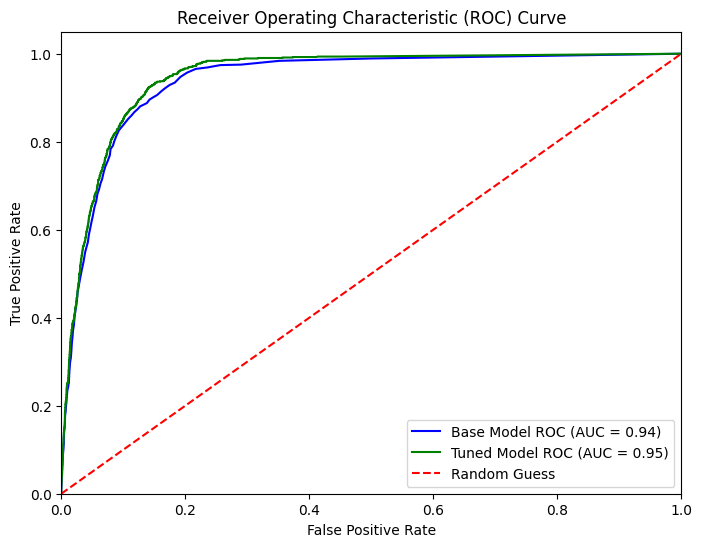

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score

# Define a base pipeline (with optional scaling)
base_pipeline = Pipeline([
    ('rf', RandomForestClassifier(random_state=707))  # base model with default parameters
])

# Train the base pipeline on your training data
base_pipeline.fit(X_train, y_train)


# --- Base Model ROC ---
# Get predictions and probabilities for the base model
y_pred_base = base_pipeline.predict(X_test)
y_probas_base = base_pipeline.predict_proba(X_test)[:, 1]  # probabilities for positive class ('yes')

# Compute ROC curve values for the base model
fpr_base, tpr_base, thresholds_base = roc_curve(y_test, y_probas_base, pos_label='yes')
roc_auc_base = roc_auc_score(y_test, y_probas_base)

# --- Tuned Model ROC ---
# Get predictions and probabilities for the tuned model
y_pred_tuned = pipeline.predict(X_test)  # 'pipeline' is your tuned model pipeline
y_probas_tuned = pipeline.predict_proba(X_test)[:, 1]  # probabilities for positive class ('yes')

# Compute ROC curve values for the tuned model
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, y_probas_tuned, pos_label='yes')
roc_auc_tuned = roc_auc_score(y_test, y_probas_tuned)

# --- Plot Both ROC Curves ---
plt.figure(figsize=(8, 6))
# Plot ROC for base model
plt.plot(fpr_base, tpr_base, color='blue', label=f'Base Model ROC (AUC = {roc_auc_base:.2f})')
# Plot ROC for tuned model
plt.plot(fpr_tuned, tpr_tuned, color='green', label=f'Tuned Model ROC (AUC = {roc_auc_tuned:.2f})')
# Plot diagonal line representing random chance
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


This ROC plot shows two curves—one for the base model (blue) and one for the tuned model (green)—both of which perform significantly better than random guessing (the diagonal red line). Here’s what stands out:

1. High AUC for Both Models:

Base Model AUC = 0.94

Tuned Model AUC = 0.95
Both models demonstrate strong discriminative ability. An AUC in the mid- to high-0.90s indicates that each model is very good at distinguishing between positive (yes) and negative (no) cases.

2. Slight Edge for the Tuned Model:

The tuned model’s ROC curve (green) is marginally above the base model’s curve (blue), resulting in a slightly higher AUC (0.95 vs. 0.94).

This difference suggests that hyperparameter tuning yielded a small but measurable improvement in the model’s ability to rank positive instances above negative ones.

3. Visual Similarity:

The two curves are close, indicating that the performance difference is not massive. Nonetheless, a small improvement can be meaningful in some marketing contexts, especially if the cost of false positives or missed opportunities is high.

4. Above Random Guess:

Both models are well above the red dashed line (representing random guessing, AUC = 0.50), confirming that they’re providing substantial predictive value.

Overall, while the base model already performs quite well, the tuned model shows a modest performance gain. Depending on the application’s cost-benefit trade-offs (e.g., the cost of a false positive vs. the benefit of a true positive), even this small improvement might be worthwhile.

### ***6.2 Visualizing the Confusion Matrix***

We've taken a look at confusion matrices in base model evaluation section. Let's try using a heatmap-style table to better understand the usefulness of confusion matrices. Confusion matrices are meant to summarize how well your classfication model is performing by showing the counts of correct and incorrect predictions.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix for the tuned model predictions.
# - y_test: the true labels of the test set.
# - y_pred_tuned: the predictions produced by the tuned RandomForest model.
# - labels=['no', 'yes']: ensures the matrix rows/columns follow the specified order for the classes.
cm_tuned = confusion_matrix(y_test, y_pred_tuned, labels=['no', 'yes'])

# Print the confusion matrix to the console.
print("Confusion Matrix:")
print(cm_tuned)

# Create a ConfusionMatrixDisplay object using the computed confusion matrix.
# This object prepares the visualization of the confusion matrix.
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=['no', 'yes'])

# Plot the confusion matrix using a blue color map for clarity.
disp.plot(cmap=plt.cm.Blues)

# Add a title and axis labels to the plot for better understanding.
plt.title("Confusion Matrix - Tuned Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Display the plot.
plt.show()


Here’s what stands out in this confusion matrix for your tuned model:

1. Majority Class (“no”):

- True Negatives (TN): 6,717 instances were correctly classified as “no.”

- False Positives (FP): 593 instances labeled “yes” by the model, but the true label was “no.”

- This indicates the model is generally good at identifying “no” cases but does allow some false positives.

2. Minority Class (“yes”):

- False Negatives (FN): 187 instances labeled “no,” but they were actually “yes.”

- True Positives (TP): 741 instances correctly classified as “yes.”

- This suggests the model does a solid job capturing actual “yes” cases, though some positive instances are missed (187).

### ***6.3 Feature Importances***

A feature importance plot shows which input variables most strongly influence the model’s predictions. This helps you understand the factors driving the marketing outcome and can provide insights into customer behavior.

In [ ]:
# --- Feature Importances ---

# Retrieve the feature importances from the RandomForestClassifier within the pipeline.
# The model stores an array of importance scores for each feature, indicating the contribution of each feature to the model.
importances = pipeline.named_steps['rf'].feature_importances_

# Assuming X_train is a pandas DataFrame, get its column names which correspond to the features.
feature_names = X_train.columns  # If X_train is not a DataFrame, this line should be adjusted accordingly.

# Create a pandas Series combining feature names with their corresponding importance scores.
# Sorting the Series in ascending order makes it easier to visualize which features are most and least important.
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=True)

# Set up the plot with a custom size for better visibility.
plt.figure(figsize=(10, 8))

# Plot the feature importances as a horizontal bar chart.
feat_importances.plot(kind='barh')

# Add a title and label the axes to provide clear context.
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")

# Display the plot.
plt.show()


This feature importance chart shows how much each variable contributes to the random forest’s predictions of whether a customer will subscribe to a term deposit. Here are the key takeaways:

1. Dominant Feature: `duration`

- The call duration dwarfs every other feature, suggesting that longer calls strongly correlate with a “yes” outcome.

- In many versions of the bank marketing dataset, `duration` is known to be highly predictive but also somewhat post-hoc—it depends on whether the call lasted longer because the customer was interested. Some analyses even exclude `duration` to avoid leaking this outcome-related information.

2. Other Strong Predictors

- `nr.employed`, `euribor3m`, `cons.conf.idx`, `cons.price.idx`: Economic indicators (e.g., employment numbers, consumer confidence, consumer prices) are among the next most influential features. This makes sense—favorable economic conditions can affect customers’ likelihood to invest in a term deposit.

- `pdays`, `campaign`, `previous`: These capture past campaign interactions (days since last contact, number of contacts during this campaign, and number of contacts before this campaign). A positive history of engagement often boosts the probability of saying “yes.”

3. Months and Other Categoricals

- Certain months (e.g., `month_may`, `month_oct`) have higher importance, implying seasonal effects. Some months might historically yield better subscription rates.

- Variables like `education`, `job`, and `marital` show up further down the list, but they still add incremental predictive power.

4. Interpretation for Marketing

- High `duration”` importance: If you keep “duration” in the model, be aware it can overshadow other insights. This feature might indicate that as soon as a call lasts beyond a certain threshold, the likelihood of subscription increases sharply.

- Economic Indicators: Monitoring these external factors (e.g., `nr.employed`, `euribor3m`) can help you time campaigns when market conditions are favorable.

- Campaign History: Customers who were successfully engaged or contacted more often in previous campaigns may be more receptive now, so segmenting based on these past interactions can boost efficiency.

Overall, this chart confirms that call duration is the single biggest driver in predicting term deposit subscriptions, with a variety of economic indicators and campaign-related features also contributing significantly.

## ***6. Insights and Wrap-Up***

Congratulations on making it to the end of the activity! Now it's time to share your findings with the stakeholders of Baekho Bank. What will you say?

Well...

After a comprehensive modeling process using a tuned random forest classifier, our predictive tool demonstrates a robust ability to identify potential term deposit subscribers. The tuned model achieved an accuracy of 90.3%, a recall of 80.6%, and a precision of 54.8%. These metrics indicate that the model is especially effective at capturing a high proportion of actual subscribers—a crucial advantage in marketing, where missing out on high-value customers can be costly.

**Key Insights from Feature Importances**

One of the standout aspects of our analysis is the feature importance evaluation. This visualization revealed which variables most strongly influence the model’s predictions and, consequently, customer behavior:

- Call Duration:

  - Dominant Predictor:
  Call duration emerged as the single most important feature. Longer calls strongly correlate with a “yes” outcome, likely reflecting higher customer engagement.

  - Marketing Impact:
  This insight suggests that training call agents to engage customers more effectively could be key. For instance, if certain call scripts or techniques result in longer conversations, these could be standardized or emphasized across campaigns.

- Economic Indicators (e.g., `euribor3m`, `cons.price.idx`, `cons.conf.idx`, `nr.employed`):

  - Influential External Factors: These features reflect the broader economic environment. A favorable economic climate often boosts consumer confidence, making customers more receptive to banking products.

  - Marketing Impact: Understanding these variables can help time marketing campaigns. For example, launching campaigns during periods of high consumer confidence or low euribor3m may yield higher conversion rates. Tailoring messaging to highlight economic stability or investment security can further enhance effectiveness.

- Campaign History (e.g., `previous`, `campaign`, `pdays`):

  - Engagement and Persistence:Variables related to previous contacts and campaign interactions indicate that customers with a history of engagement are more likely to subscribe.

  - Marketing Impact: These insights support the development of targeted follow-up strategies. Customers who have been contacted before, particularly those with positive past responses, should be prioritized in future campaigns, potentially with personalized offers or incentives.

- Other Demographic and Behavioral Features:

  - While not as dominant as the above factors, features such as job, education, and marital status still contribute to the model’s predictions.

  - Marketing Impact: These can be used to further segment the customer base. For example, specific job categories or educational backgrounds may respond better to certain types of messaging, allowing for a more tailored marketing approach.

Strategic Recommendations
1. Integrate the Predictive Model into Campaign Management:

- Deploy the model in your CRM system to score and segment customers in real-time, ensuring that your marketing team focuses on leads with the highest likelihood of conversion.

2. Optimize Call Strategies:

- Use the insight from call duration to train agents in effective communication strategies. Experiment with call scripts or incentives that naturally extend call time and, by extension, customer engagement.

3. Time and Tailor Campaigns Using Economic Data:

- Monitor key economic indicators and plan campaigns during periods that historically correlate with higher subscription rates. Tailor your messaging to reflect the current economic sentiment, emphasizing stability and opportunity.

4. Retarget and Personalize Outreach:

- Leverage campaign history by identifying and prioritizing customers who have shown previous engagement. Consider personalized follow-ups or special offers to maximize conversion rates.

**Wrap-Up:**

In this exercise, we began by exploring the bank marketing dataset, then built and tuned a random forest classifier using Optuna. We evaluated the model using accuracy, precision, recall, ROC curves, and confusion matrices. The tuned model, despite a slight drop in precision compared to the baseline, delivers a significant boost in recall (80.6%), which is critical in ensuring that we capture a high percentage of potential subscribers.

The feature importance analysis revealed key drivers like call duration, economic indicators, and campaign history, all of which provide actionable insights for optimizing marketing strategies. By integrating this predictive model into the bank's campaign management process, we can enhance targeting, personalize outreach, and time our campaigns more effectively to maximize conversions and overall campaign success.

In summary, our work not only produced a highly effective predictive model but also yielded valuable behavioral and economic insights that empower the bank to scale its marketing efforts strategically.




## ***7. Further Learning***

You’ve trained a solid model and tuned it for accuracy. Here are some additional experiments and challenges you can try to further your understanding:

- Optimizing for Recall
- Handling Class Imbalance with SMOTE
- Feature Engineering
- Segment Analysis
- Threshold Tuning

These challenges will deepen your understanding and help you tailor the model to different needs or constraints. We've provided the code, it will be your challenge to implement them into the model we've built.

### ***7.1 Optimizing for Recall***

We optimized for the F1 score during our training. The objective here is to maximize recall during cross-validation to ensure that most potential subscribers are captured—even if it means contacting a few extra leads.

**When to implement:**

Use this code during the model evaluation phase (before or alongside your tuned model evaluation) to compare recall-focused performance.



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize a base RandomForestClassifier (you can use default or tuned parameters here)
rf_recall = RandomForestClassifier(random_state=707)

# Perform 5-fold cross-validation using recall as the scoring metric
recall_scores = cross_val_score(rf_recall, X_train, y_train, cv=5, scoring='recall', n_jobs=-1)

# Display the average recall score
print(f'Average Recall Score: {recall_scores.mean():.4f}')


### ***7.2 Handling Class Imbalance with SMOTE***

We'll address the class imbalance of the dataset by oversampling the minority class to ensure the model learns sufficient patterns for the "yes" class.

SMOTE (Synthetic Minority Over-sampling Technique) is a method to balance class distribution by generating synthetic examples for the minority class, which helps when dealing with imbalanced datasets.

**When to implement:**
Apply this immediately after splitting your data into training and test sets and before training your model.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check the class distribution in the training set
print('Class distribution before SMOTE:', Counter(y_train))

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print('Class distribution after SMOTE:', Counter(y_train_sm))

### ***7.3 Feature Engineering***

This is just a small snippet of what you coould do, but here as an example, we will evaluate the impact of the `duration` feature. Often a dominant predictor that may reflect post-call effects—by training the model without it.

**When to implement:**
Add the code that drops the 'duration' feature right after you split the dataset into training and testing sets—and before you train your model. This is part of the feature engineering phase. For example:

1. Split Your Data:
First, split your original dataset into X_train and X_test (and their corresponding y_train and y_test).

2. Drop the `duration` Feature:
Immediately after splitting, create new training and testing sets (e.g., X_train_fe and X_test_fe) that exclude the 'duration' column.

3. Train and Evaluate:
Use these modified sets (X_train_fe and X_test_fe) to train your model and evaluate performance, comparing the results to those obtained with the full feature set.

For example:



In [ ]:
# Assume X and y have already been defined from the dataset

# 1. Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. --- Feature Engineering: Exclude the 'duration' feature ---
# This is where you remove 'duration' from your training and testing sets
X_train_fe = X_train.drop(columns=['duration'])
X_test_fe = X_test.drop(columns=['duration'])

# 3. Train the model using the feature-engineered data
from sklearn.ensemble import RandomForestClassifier
rf_fe = RandomForestClassifier(random_state=707)
rf_fe.fit(X_train_fe, y_train)

# 4. Evaluate the model
y_pred_fe = rf_fe.predict(X_test_fe)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_fe))


### ***7.4 Segment Analysis***

The goal is to analyze model performance for specific customer segments (e.g., clients with a particular job) to tailor marketing strategies for different groups.You can apply this to a variety of different features.

**When to Implement:**

Use this code during the analysis phase after initial model evaluation to identify segments that may need customized marketing approaches.

In [ ]:
# Define a segment: for example, customers with the job 'technician'
job_category = 'technician'
# Note: Ensure that the job information is available in your features. If 'job' is part of X_train, adjust accordingly.
X_train_segment = X_train[X_train['job'] == job_category]
y_train_segment = y_train[X_train['job'] == job_category]

X_test_segment = X_test[X_test['job'] == job_category]
y_test_segment = y_test[X_test['job'] == job_category]

# Train and evaluate a RandomForestClassifier on this segment
rf_segment = RandomForestClassifier(random_state=42)
rf_segment.fit(X_train_segment, y_train_segment)
y_pred_segment = rf_segment.predict(X_test_segment)

print(f'Performance for job category: {job_category}')
print(classification_report(y_test_segment, y_pred_segment))


### ***7.5 Threshold Tuning***

The goal here is to explore how adjusting decision threshold affects precision and recall, and determine the optimal threshold for your business goals.

**When to implement:**

During the model evaluation phase, after generating predicted probabilities, to fine-tune the decision boundary.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities from a trained RandomForest model (e.g., the tuned model)
y_scores = pipeline.predict_proba(X_test)[:, 1]

# Compute precision-recall pairs for different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores, pos_label='yes')

# Plot the precision and recall values against the thresholds (excluding the last point)
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs. Threshold')
plt.legend(loc='best')
plt.show()
